# 1. Recode all examples

In [1]:
# 导入所需模块
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 查看cv2版本号
cv2.__version__

'3.4.2'

In [3]:
# 0为单通道灰度图 1为三通道彩色图
image = cv2.imread('face.jpg', 0)
print(image)

[[149 152 158 ...  34  37  42]
 [151 155 160 ...  36  41  47]
 [156 159 164 ...  41  47  53]
 ...
 [ 36  34  43 ...  91  90  88]
 [ 37  34  42 ...  91  90  88]
 [ 38  34  41 ...  91  90  88]]


In [6]:
image = cv2.imread('face.jpg', 1)
cv2.imshow('image', image)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [5]:
image = cv2.imread('face.jpg', 0)
cv2.imshow('image', image)
# 按任意键退出
cv2.waitKey(0)

112

OpenCV 图像是bgr格式
matplotlib、Pillow等模块 图像是rgb格式

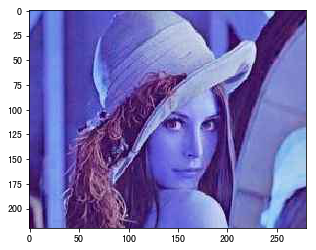

In [12]:
image = cv2.imread('face.jpg', 1)
plt.imshow(image)

In [13]:
# 将图像分割成r, g, b通道
b, g, r = cv2.split(image)

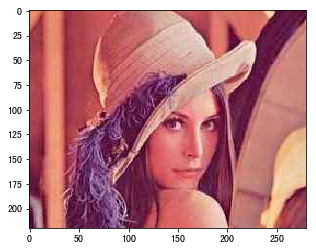

In [15]:
# 重新组合生成三通道图像
image_new = cv2.merge((r, g, b))
plt.imshow(image_new)

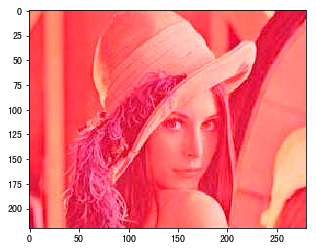

In [18]:
# 修改通道像素值改变图像亮度 最大为255
const = 55
r[r>200] = 255
r[r<=200] = r[r<=200] + const
image_new = cv2.merge((r, g, b))
plt.imshow(image_new)

gamma correction

In [22]:
def gamma_adjust(img, gamma=1.0):
    # 原像素值对应新像素值
    table = []
    for i in range(256):
        # 归一化
        table.append([((i/255.0)**gamma)*255])
    table = np.array(table).astype('uint8')
    img_gamma = cv2.LUT(img, table)
    return img_gamma

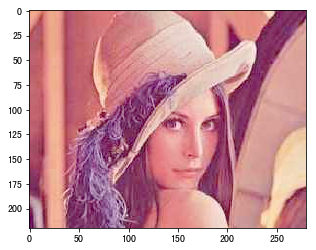

In [24]:
image = cv2.imread('face.jpg', 1)
b, g, r = cv2.split(image)
image_new = cv2.merge((r, g, b))
image_gamma = gamma_adjust(image_new, gamma=0.7)
plt.imshow(image_gamma)

image_crop

In [25]:
image = cv2.imread('face.jpg', 1)
print(image.shape)

(220, 280, 3)


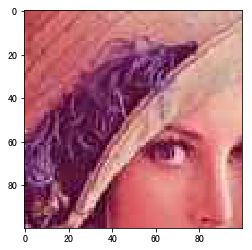

In [26]:
image_crop = image[50:150, 80:180]
b, g, r = cv2.split(image_crop)
image_new = cv2.merge((r, g, b))
plt.imshow(image_new)

In [27]:
image = cv2.imread('face.jpg', 1)
image.flatten().shape

(184800,)

In [34]:
image = cv2.imread('face.jpg', 0)
# 将高维数组降成一维
hist = image.flatten()

(array([1.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 6.000e+00, 4.000e+00, 2.000e+00, 2.000e+00, 5.000e+00,
        0.000e+00, 3.000e+00, 1.000e+01, 9.000e+00, 1.100e+01, 1.300e+01,
        1.300e+01, 1.400e+01, 1.800e+01, 1.500e+01, 2.600e+01, 2.700e+01,
        3.000e+01, 3.100e+01, 4.900e+01, 4.600e+01, 5.700e+01, 7.700e+01,
        6.900e+01, 6.600e+01, 8.200e+01, 9.500e+01, 1.210e+02, 1.020e+02,
        1.180e+02, 1.530e+02, 1.740e+02, 1.950e+02, 2.200e+02, 2.470e+02,
        3.090e+02, 3.060e+02, 3.310e+02, 3.550e+02, 4.510e+02, 4.040e+02,
        4.430e+02, 4.910e+02, 4.380e+02, 4.470e+02, 4.780e+02, 5.000e+02,
        4.630e+02, 4.710e+02, 3.940e+02, 3.470e+02, 3.250e+02, 3.090e+02,
        2.690e+02, 2.630e+02, 2.600e+02, 2.010e+02, 2.460e+02, 2.110e+02,
        2.110e+02, 2.030e+02, 2.040e+02, 2.110e+02, 1.980e+02, 2.180e+02,
        2.170e+02, 2.390e+02, 2.620e+02, 2.470e+02, 2.480e+02, 2.250e+02,
        2.650e+02, 2.290e+02, 1.900e+0

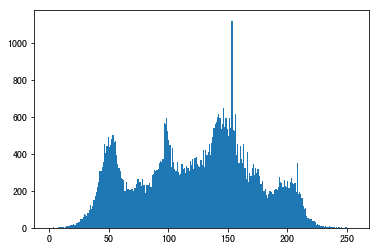

In [35]:
plt.hist(hist, 256, [0, 256])

(array([ 116.,  224.,  203.,  243.,  223.,  271.,  174.,  195.,  220.,
         247.,  309.,  306.,    0.,  331.,  355.,    0.,  451.,    0.,
         404.,    0.,  443.,    0.,  491.,  438.,    0.,  447.,    0.,
         478.,    0.,  500.,    0.,  463.,    0.,  471.,    0.,  394.,
         347.,    0.,  325.,  309.,  269.,  263.,  260.,  201.,  246.,
         211.,  211.,  407.,  211.,  198.,  218.,  217.,  239.,  262.,
         247.,  248.,  225.,  265.,  229.,  190.,  230.,  234.,  231.,
         244.,  222.,  287.,  292.,  311.,    0.,  310.,  315.,  316.,
           0.,  349.,  362.,    0.,  357.,  374.,    0.,  568.,    0.,
           0.,  562.,    0.,  596.,    0.,  525.,    0.,  474.,    0.,
         449.,    0.,  330.,  434.,    0.,  358.,  321.,    0.,  309.,
         355.,  300.,  286.,    0.,  292.,  348.,  321.,    0.,  326.,
         296.,  335.,    0.,  324.,  308.,  359.,    0.,  341.,  371.,
           0.,  316.,  376.,    0.,  383.,  345.,    0.,  333.,  329.,
      

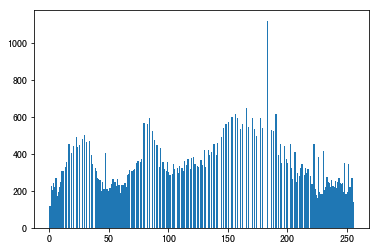

In [36]:
image = cv2.imread('face.jpg', 0)
image_eq = cv2.equalizeHist(image)
hist = image_eq.flatten()
plt.hist(hist, 256, [0, 256])

Similarity Transform 相似变换：旋转 (线性变换)，平移(向量加)
<br><br>
Affine Transform 仿射变换：旋转，平移，缩放(线性变换)，错切，反转
<br>
仿射变换是一种二维坐标到二维坐标之间的线性变换，它保持了二维图形的“平直性”（直线经过变换之后依然是直线）和“平行性”（二维图形之间的相对位置关系保持不变，平行线依然是平行线，且直线上点的位置顺序不变）。任意的仿射变换都能表示为乘以一个矩阵(线性变换)，再加上一个向量 (平移) 的形式。
<br><br>
Perspective Transform 投影（透视）变换：将2D矩阵图像变换成3D空间显示效果，全景拼接。旋转，平移，缩放，错切，射影
<br>
透视变换是将图片投影到一个新的视平面，也称作投影映射。它是二维(x,y)到三维(x,y,z)再到另一个二维(x’,y’)空间的映射。相对于仿射变换，它提供了更大的灵活性，将一个四边形区域映射到另一个四边形区域（不一定是平行四边形）。

# 2. Please change image color through YUV space

In [1]:
# 导入所需模块
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
image = cv2.imread('face.jpg', 1)
image_YUV = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
print(image_YUV.shape)
cv2.imshow('YUV', image_YUV)
cv2.waitKey(0)

(220, 280, 3)


In [3]:
# 获取Y通道
y = image_YUV[:, :, 0]
print(y)
print('---')
# 获取U通道
u = image_YUV[:, :, 1]
print(u)
print('---')
# 获取Y通道
v = image_YUV[:, :, 2]
print(v)

[[149 152 158 ...  34  37  42]
 [151 155 160 ...  36  41  47]
 [156 159 164 ...  41  47  53]
 ...
 [ 36  34  43 ...  91  90  88]
 [ 37  34  42 ...  91  90  88]
 [ 38  34  41 ...  91  90  88]]
---
[[ 97  97  97 ... 133 133 133]
 [ 97  97  97 ... 133 133 133]
 [ 97  97  98 ... 134 134 134]
 ...
 [145 143 141 ... 126 126 126]
 [145 143 141 ... 126 126 126]
 [145 143 141 ... 126 126 126]]
---
[[187 189 189 ... 167 167 167]
 [187 189 189 ... 167 167 167]
 [187 189 189 ... 167 167 167]
 ...
 [166 166 164 ... 174 174 174]
 [166 166 164 ... 174 174 174]
 [166 166 164 ... 174 174 174]]


In [4]:
# 修改y通道像素值改变图像亮度 最大为255
const = 55
y[y>200] = 255
y[y<=200] = y[y<=200] + const
image_YUV[:, :, 0] = y
cv2.imshow('YUV', image_YUV)
cv2.waitKey(0)

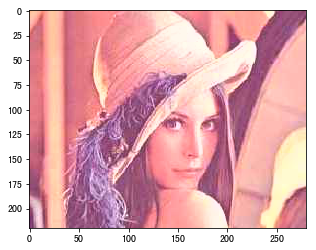

In [6]:
image = cv2.cvtColor(image_YUV, cv2.COLOR_YUV2BGR)
b, g, r = cv2.split(image)
image_new = cv2.merge((r, g, b))
plt.imshow(image_new)

# 3. Combine image crop, color shift, rotation and perspective transform together to complete a data augmentation script

In [12]:
import random

# perspective transform
def random_warp(img, row, col):
    height, width, channels = img.shape

    # warp:
    random_margin = 60
    x1 = random.randint(-random_margin, random_margin)
    y1 = random.randint(-random_margin, random_margin)
    x2 = random.randint(width - random_margin - 1, width - 1)
    y2 = random.randint(-random_margin, random_margin)
    x3 = random.randint(width - random_margin - 1, width - 1)
    y3 = random.randint(height - random_margin - 1, height - 1)
    x4 = random.randint(-random_margin, random_margin)
    y4 = random.randint(height - random_margin - 1, height - 1)

    dx1 = random.randint(-random_margin, random_margin)
    dy1 = random.randint(-random_margin, random_margin)
    dx2 = random.randint(width - random_margin - 1, width - 1)
    dy2 = random.randint(-random_margin, random_margin)
    dx3 = random.randint(width - random_margin - 1, width - 1)
    dy3 = random.randint(height - random_margin - 1, height - 1)
    dx4 = random.randint(-random_margin, random_margin)
    dy4 = random.randint(height - random_margin - 1, height - 1)

    pts1 = np.float32([[x1, y1], [x2, y2], [x3, y3], [x4, y4]])
    pts2 = np.float32([[dx1, dy1], [dx2, dy2], [dx3, dy3], [dx4, dy4]])
    M_warp = cv2.getPerspectiveTransform(pts1, pts2)
    img_warp = cv2.warpPerspective(img, M_warp, (width, height))
    return img_warp

# 转换成RGB格式使用matplotlib显示
def cvt2RGB2show(image):
    b, g, r = cv2.split(image)
    image_new = cv2.merge((r, g, b))
    plt.imshow(image_new)

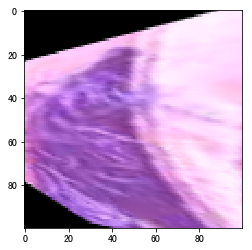

In [13]:
# 图像裁剪
image_crop = image[50:150, 80:180]
# 颜色变换
b, g, r = cv2.split(image_crop)
b[b>200] = 255
b[b<=200] = b[b<=200] + 55
image_new = cv2.merge((b, g, r))
# 旋转
M = cv2.getRotationMatrix2D((image_new.shape[1] / 2, image_new.shape[0] / 2), 30, 1)
image_rotate = cv2.warpAffine(image_new, M, (image_new.shape[1], image_new.shape[0]))
# 透视
image_perspective = random_warp(image_rotate, image_rotate.shape[0], image_rotate.shape[1])
cvt2RGB2show(image_perspective)

# 4. Do think about your own interests very carefully and choose your topic within 4 weeks. 